# Init.

In [42]:
import pandas as pd
from sklearn.datasets import load_breast_cancer  # Built-in dataset: breast cancer classification
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.linear_model import LogisticRegression   # ML model: Logistic Regression (linear classifier)
from sklearn.tree import DecisionTreeClassifier       # ML model: Decision Tree (non-linear classifier)
from sklearn.metrics import classification_report, confusion_matrix  # To evaluate model performance
import math   # For mathematical operations (not directly needed yet)

# For visualization (we may use it later to plot data)
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.tree import plot_tree

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")


# Data Prep.

In [2]:
# We use the built-in Breast Cancer dataset from sklearn.
# It contains information about breast tumor cells (numerical features)
# and the target (malignant = cancerous, benign = non-cancerous).
data_loader = load_breast_cancer(as_frame=True)  # 'as_frame=True' gives us a pandas DataFrame
data_loader

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [3]:
# The dataset is stored in a dictionary-like object with several keys.
data_loader.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# The target is what we want to predict: cancerous or not.
data_loader["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# Each dataset also comes with a description to explain it.
print(data_loader["DESCR"])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# Preview dataset
data_loader["data"]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# The 'frame' combines features + target into one DataFrame for easier handling.
data = data_loader.frame
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# EDA (Simple)

In [8]:
# Check how many samples we have for each target class
# (0 = malignant, 1 = benign) from metadata
data.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

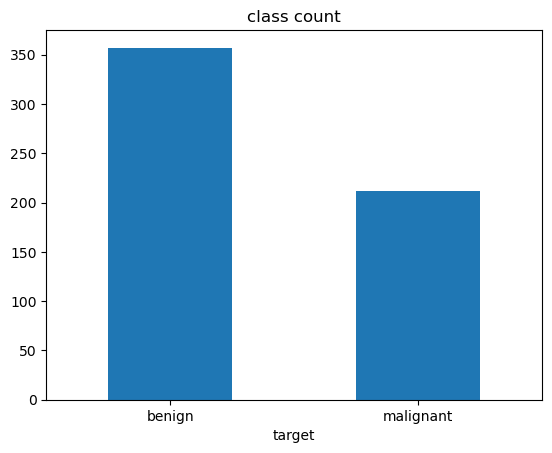

In [9]:
# Make the target labels easier to understand (replace 0/1 with words)
target_meaning = {
    0: "malignant",
    1: "benign",
}

# Show class distribution as a bar chart
data.target.replace(target_meaning).value_counts().plot(kind="bar", rot=0, title="class count");

In [10]:
# Get summary statistics (mean, std, min, max, quartiles) for each feature
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
# Check correlation of each feature with the target
# (closer to 1 or -1 -> stronger relationship)
data_loader["frame"].corr().apply(abs).loc["target"].sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

<Figure size 800x400 with 0 Axes>

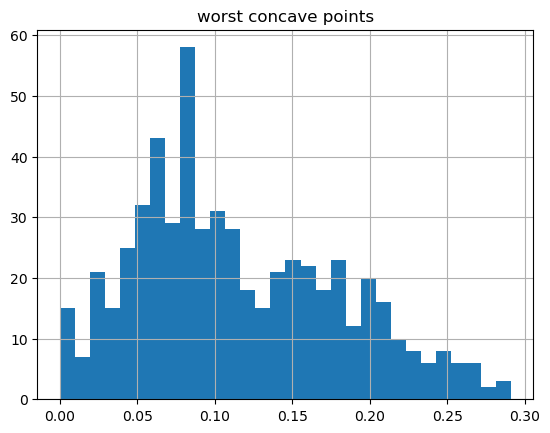

<Figure size 800x400 with 0 Axes>

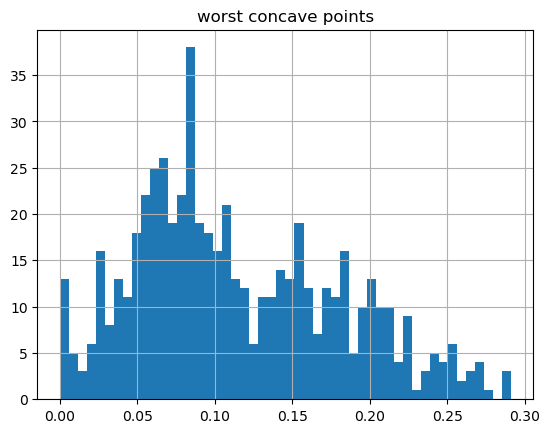

<Figure size 800x400 with 0 Axes>

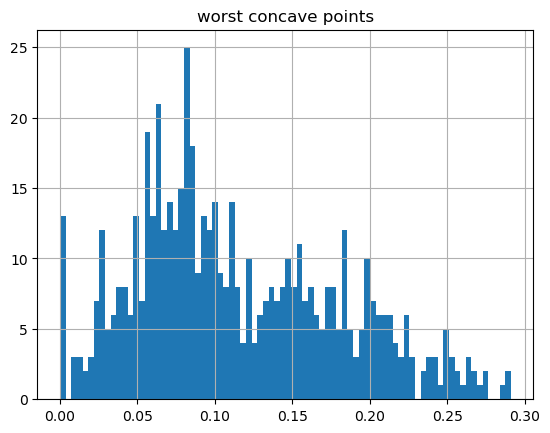

In [23]:
# Plot histogram of a single feature
# "worst concave points" is one of the most correlated feature to target
for bin_count in [30, 50, 80]:
    plt.figure(figsize=(8, 4))
    data[["worst concave points"]].hist(bins=bin_count)
    plt.show()

<Axes: xlabel='worst concave points', ylabel='Count'>

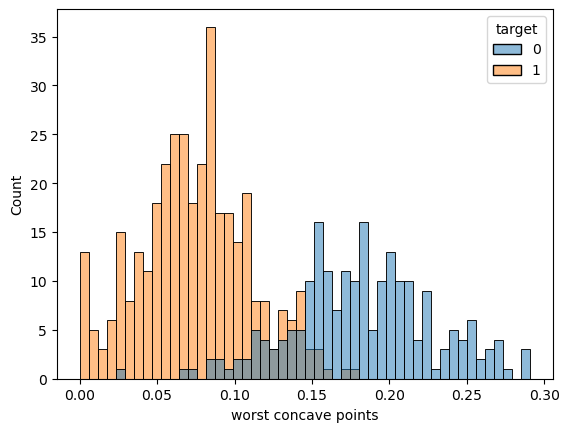

In [24]:
# Compare distribution of "worst concave points" between malignant and benign tumors
sns.histplot(
    data=data,
    x="worst concave points",
    hue="target",
    bins=50
)

Notes:  

- Class balance: always check how many samples per class. Imbalanced classes can bias the model.  
- Describe(): quick way to understand the scale and spread of features.  
- Correlation with target: helps identify which features are most useful for prediction.  
- Visualizations: plotting features (like worst concave points) by target shows if they separate classes well.  

# Prep

In [25]:
# Select which features (columns) to use for training
# For now we only use one feature: "worst concave points"
# Later, we could try using ALL features: data.columns[:-1]
features = ['worst concave points']
features

['worst concave points']

In [26]:
# The last column in the DataFrame is our target (0 = malignant, 1 = benign)
target = data.columns[-1]
target

'target'

In [27]:
# Separate the dataset into inputs (X) and output/labels (y)
X = data[features]   # Features
y = data[target]     # Target
display(X)           # Show selected features
display(y)           # Show target values

,worst concave points
0,0.2654
1,0.1860
2,0.2430
3,0.2575
4,0.1625
...,...
564,0.2216
565,0.1628
566,0.1418
567,0.2650


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Split Data

In [29]:
# Split the data into training and testing sets
# - 80% for training (used to fit the model)
# - 20% for testing (used to check model performance on unseen data)
# random_state=42 ensures reproducibility (you get the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                                    test_size=0.2, 
                                                    random_state=42)

# [Optional] Preview train set (features only)
X_train.head()

,worst concave points
68,0.17500
181,0.29030
63,0.05087
248,0.06136
60,0.02579


In [30]:
# [Optional] Preview test set (features only)
X_test.head()

,worst concave points
204,0.10150
70,0.17890
131,0.15140
431,0.07370
540,0.06918


In [31]:
# [Optional] Preview train set (target only)
y_train.head()

68     1
181    0
63     1
248    1
60     1
Name: target, dtype: int64

In [32]:
# [Optional] Preview test set (target only)
y_test.head()

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64

# Modeling

In [33]:
# Logistic Regression is a simple linear classifier.
# It tries to separate malignant vs benign using a straight line (or curve in higher dimensions).
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)          # Train the model using training data
y_pred_lr = lr.predict(X_test)    # Make predictions on test data

In [ ]:
# model specification
lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
# Decision Tree is a non-linear model.
# It splits the data into branches based on feature values (like asking yes/no questions).
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)          # Train the model using training data
y_pred_dt = dt.predict(X_test)    # Make predictions on test dataN

In [60]:
X_train 

,worst concave points
68,0.17500
181,0.29030
63,0.05087
248,0.06136
60,0.02579
...,...
71,0.04786
106,0.12180
270,0.03333
435,0.18270


In [46]:
# comapare predict 
pred_compare = pd.DataFrame({
    "Actual": y_test,
    "Predicted (Logistic Regression)": y_pred_lr,
    "Predicted (Decision Tree)": y_pred_dt
})

pred_compare

,Actual,Predicted (Logistic Regression),Predicted (Decision Tree)
204,1,1,1
70,0,1,0
131,0,1,0
431,1,1,1
540,1,1,1
...,...,...,...
486,1,1,1
75,0,1,0
249,1,1,1
238,1,1,1


Note:  

- Both models are trained using the same training set but may perform differently.  
- Logistic Regression = good baseline, simple, interpretable.  
- Decision Tree = flexible, can capture more complex patterns, but may overfit.  
- Predictions (y_pred_lr, y_pred_dt) are what the models think the test samples should be classified as.  

# Evaluation

## Confusion Matrix

In [47]:
# Confusion Matrix for Logistic Regression
# Rows = actual labels, Columns = predicted labels
# Top-left = correctly predicted malignant
# Bottom-right = correctly predicted benign
confusion_matrix(y_test, y_pred_lr)

array([[22, 21],
       [ 0, 71]])

In [48]:
# Confusion Matrix for Decision Tree
confusion_matrix(y_test, y_pred_dt)

array([[38,  5],
       [ 5, 66]])

## Classification Report

In [49]:
# Classification report for Logistic Regression
# Shows Precision, Recall, F1-score, and Accuracy
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68        43
           1       0.77      1.00      0.87        71

    accuracy                           0.82       114
   macro avg       0.89      0.76      0.77       114
weighted avg       0.86      0.82      0.80       114



In [50]:
# Classification report for Decision Tree
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



Note:  

- Precision: Of all samples predicted as positive, how many were correct?  
- Recall: Of all actual positives, how many did we find?  
- F1-score: Balance between Precision and Recall.  
- Accuracy: Overall percentage of correct predictions.  

# Use Model

In [51]:
worst_concave_points_test = .03 #.11 #.1105 # .11 # .1125

In [52]:
# Use the trained Decision Tree to predict its class
# Note: we pass the value inside [[ ]] because the model expects a 2D array
test_pred = dt.predict([[worst_concave_points_test]])
test_pred

array([1])

## Model Prediction

In [53]:
# Convert the numeric prediction (0 or 1) into a human-readable label
target_meaning[test_pred[0]]

'benign'

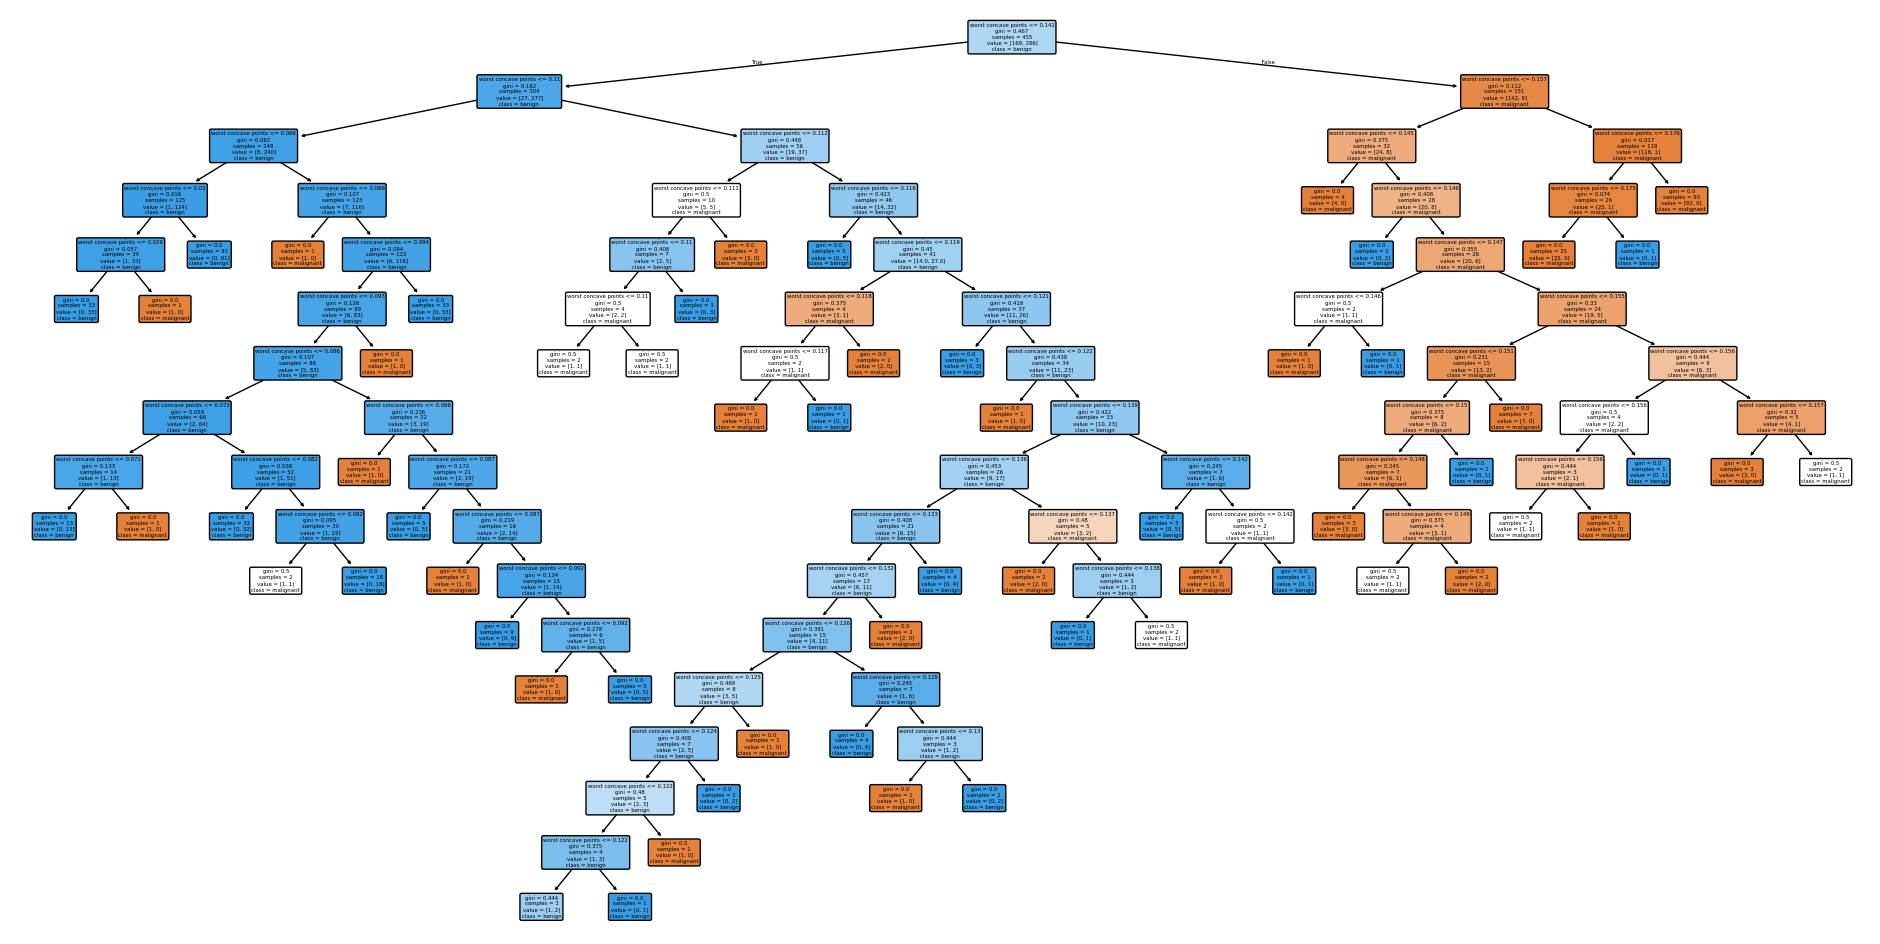

In [54]:
# Plot the trained Decision Tree
plt.figure(figsize=(12*2, 6*2))
plot_tree(
    dt, 
    feature_names=features,                        # show the feature name(s)
    class_names=list(target_meaning.values()),     # convert dict_values → list
    filled=True, 
    rounded=True
)
plt.savefig("tree.jpg", dpi=500)
plt.show()


Note:

- Input must follow the same structure as training features (even if it’s only one feature, it must be passed as a 2D array).
- The model output is 0 or 1, but mapping it back with target_meaning makes it understandable ("malignant" or "benign").

## Manual Prediction

1. **Linear function `f(x)`**  

   `f(x) = w * x + b`, where:  

   * `w` = coefficient from `lr.coef_`
   * `b` = intercept from `lr.intercept_`
   * Input `x` = `worst_concave_points_test`

   This gives you a **raw score** (sometimes called logit).

In [55]:
display(lr.coef_, lr.intercept_)

# f(x)
f_x = lambda x: lr.coef_[0][0]*x + lr.intercept_[0] 

f_x(worst_concave_points_test)

array([[-7.83983426]])

array([1.44931218])

np.float64(1.214117156253032)

2. **Sigmoid function `g(f(x))`**   
   
   `g(z) = 1 / (1 + exp(-z))`

   * Converts the raw score into a probability between **0 and 1**.
   * Example: If `f(x) = -2`, then `g(-2) ≈ 0.12` → low probability of benign.

In [56]:
# g(z)
sigmoid_fn = lambda z: 1 / (1 + math.exp(-z))

# g(f(x))
sigmoid_fn(f_x(worst_concave_points_test))

0.7710266215805542

3. **Threshold classifier `h(g(f(x)))`**
   
   `h(p) = 0 if p < 0.5 else 1`

   * If probability ≥ 0.5 → **class 1**
   * If probability < 0.5 → **class 0**

   That’s what your `classifier()` function does.

In [61]:
# h(threshold, p)
classifier = lambda threshold, p: 0 if p < threshold else 1

# h(g(f(x)))
given_threshold = .5
classifier(sigmoid_fn(f_x(worst_concave_points_test)), given_threshold)

0

4. **Final mapping**

   * You then map class `0` or `1` into **meaningful labels** using `target_meaning`.
   * Example:

     * `0 → Malignant`
     * `1 → Benign`

In [62]:
target_meaning[
    classifier(sigmoid_fn(f_x(worst_concave_points_test)), given_threshold)
]

'malignant'

Note: 

1. Multiply inputs by weights (linear formula).
2. Pass result through **sigmoid** to squash into [0,1].
3. Compare with **threshold (0.5)** to decide the class.